In [2]:
# Pandas initialization
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
data = pd.read_csv(uri)

In [3]:
# Organizing the data
switch = {0 : 1, 1 : 0}

data['finished'] = data.unfinished.map(switch)

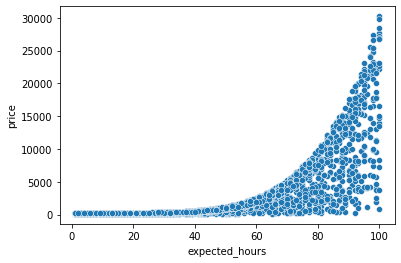

In [4]:
# Scatter ploting expected hours on the X axis and price on the Y axis
import seaborn as sns

sns.scatterplot(x="expected_hours", y="price", data=data)

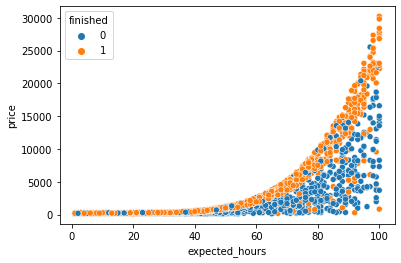

In [5]:
sns.scatterplot(x="expected_hours", y="price", hue="finished",data=data)

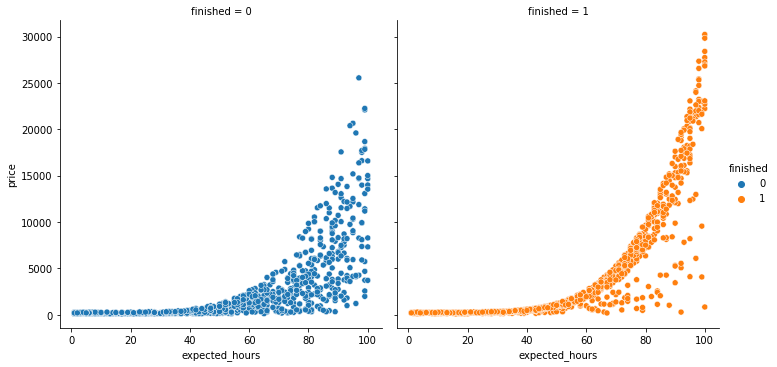

In [6]:
sns.relplot(x="expected_hours", y="price", hue="finished", col="finished",data=data)

In [7]:
# Using SKLearn to separate train from test
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score


x = data[['expected_hours', 'price']]
y = data[['finished']]

SEED = 15

train_x, test_x, train_y, test_y = train_test_split(x, y, random_state = SEED, test_size = 0.25, stratify = y)
model = LinearSVC()
model.fit(train_x,train_y)
predictions = model.predict(test_x)


accuracy = accuracy_score(test_y, predictions) * 100
print("Accuracy: %.2f%%" % accuracy)

Accuracy: 54.44%


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [8]:
#Baseline accuracy testing
import numpy as np

baseline_predictions = np.ones(540)
accuracy = accuracy_score(test_y, baseline_predictions) * 100
print("Baseline accuracy: %.2f%%" % accuracy)

Baseline accuracy: 52.59%


In [9]:
min_x = test_x.expected_hours.min()
max_x = test_x.expected_hours.max()

min_y = test_x.price.min()
max_y = test_x.price.max()

In [10]:
pixels = 100
x_axis = np.arange(min_x, max_x, (max_x - min_x)/pixels)
y_axis = np.arange(min_y, max_y, (max_y - min_y)/pixels)

In [11]:
xx, yy = np.meshgrid(x_axis, y_axis)
pontos = np.c_[xx.ravel(), yy.ravel()]

In [12]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

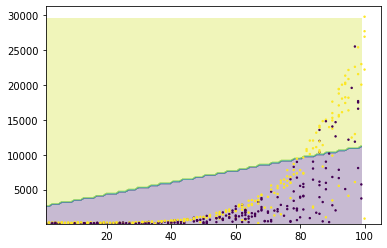

In [13]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.expected_hours, test_x.price, c=test_y.finished, s=2)

# Decision Boundary